In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import io


In [2]:
class MovAvgFilter():
    '''
    Recursive form of moving average filter
    '''
    def __init__(self, n: int=10):
        self.n = n # the number of sample
        self.isfirst = True # check the first acquisition
    
    def update(self, x):
        '''
        Args:
            x: new sample point
        '''
        # check the first acquisition
        if self.isfirst:
            self.xbuf = x * np.ones(self.n+1)
            self.preAvg = x
            avg = self.preAvg
            self.isfirst = False  
        
        else:
            self.xbuf[:self.n] = self.xbuf[1:]
            self.xbuf[self.n] = x
            avg = self.preAvg + (x - self.xbuf[0]) / self.n # update filtered value
            self.preAvg = avg # update previous value
        
        return avg
    
    def init_memory(self):
        '''
        initialize previously saved values
        '''
        self.isfirst = False
        self.preAvg = 0

In [3]:
class MovAvgFilter2():
    '''
    Batch form of moving average filter
    '''
    def __init__(self, n: int=10):
        self.n = n
        self.isfirst = True
    
    def update(self, x):
        '''
        Args:
            x: new sample point
        '''
        if self.isfirst:
            self.xbuf = x * np.ones(self.n)
            self.isfirst = False
            
        else:
            self.xbuf[:self.n-1] = self.xbuf[1:]
            self.xbuf[self.n-1] = x
            
        return np.sum(self.xbuf) / self.n
    
    def init_memory(self):
        '''
        initialize previously saved values
        '''
        self.k = 0

In [4]:
class GetSonar():
    def __init__(self):
        '''
        Load sonar data
        '''
        self.sonarAlt = io.loadmat('../source/2.MovAvgFilter/SonarAlt.mat')
        self.sonarAlt = self.sonarAlt['sonarAlt'].reshape(-1)
        self.n = 0
        
        
    def __len__(self):
        return len(self.sonarAlt)
    
    def getdata(self):
        # if all data is used, get data from first sample 
        if self.n < len(self):
            data = self.sonarAlt[self.n]
            self.n += 1
            return data
        
        else:
            self.n = 0
            return self.sonarAlt[self.n]
        

In [5]:
Nsamples = 500
t = np.arange(0, 0.2*Nsamples, 0.2)

# container for filtered data
Xsaved = np.zeros(Nsamples)
Xsaved2 = np.zeros(Nsamples)

# container for measured data
Xmsaved = np.zeros(Nsamples)

mov_avg = MovAvgFilter() # recursive type
mov_avg2 = MovAvgFilter2() # batch type

Sonar = GetSonar()

for idx in range(Nsamples):
    xm = Sonar.getdata()
    
    x1 = mov_avg.update(xm)
    x2 = mov_avg2.update(xm)
    
    Xmsaved[idx] = xm
    Xsaved[idx] = x1
    Xsaved2[idx] = x2

Text(0, 0.5, 'altitude (m)')

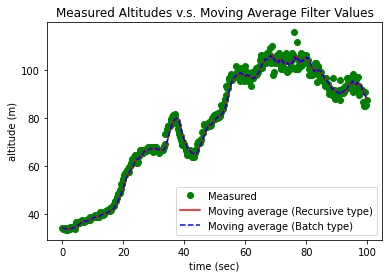

In [6]:
plt.plot(t, Xmsaved, 'go', label='Measured')
plt.plot(t, Xsaved, 'r-', label='Moving average (Recursive type)')
plt.plot(t, Xsaved2, 'b--', label='Moving average (Batch type)')
plt.legend(loc='lower right')
plt.title('Measured Altitudes v.s. Moving Average Filter Values')
plt.xlabel('time (sec)')
plt.ylabel('altitude (m)')